# Sending out invitations for CharityML Event

<div>
<img src="https://images.unsplash.com/photo-1591522810850-58128c5fb089?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1770&q=80" width="900" style="margin-left:auto; margin-right:auto"/>
</div>

# Introduction

In this project, I have applied supervised learning techniques on data collected for the U.S. census to help CharityML (a fictitious charity organization) identify people most likely to donate to their cause. The dataset provides information regarding the education level, occupation, sex, marital status, native origin and working conditions of indivduals to determine if their income is above or below 50,000USD. Folks earning greater than 50,000USD are more likely to donate to CharityML. Sending out select invitations to these people minimizes costs and efforts of the organisation.

I have evaluated the data against Naive Bayes, Random Forest Classifier, Bagging Classifier, Decision Tree and Gradient Boosting Classifier. The evaluation metric used for measuring performance is ROC-AUC score. The best performing model is optimised further by tuning the hyperparameters. The ROC-AUC curve is plotted to calculate the optimum threshold value for classification. The test data is processed before making predictions.



### The analysis of the data contains the following steps - 
1. Data Exploration
2. Feature Transformation
3. Modeling
4. Hyperparameter Tuning
5. Threshold Selection for Classification
5. Processing of Test Data
6. Prediction for Test Data & Submission

### Description of Attributes used in the Dataset

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

*****

# Data Exploration

The dataset is imported using Pandas and stored in a dataframe. The datatype of each column is checked.

In [1]:
import pandas as pd 
import numpy as np 
from time import time 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

%config InlineBackend.figure_format = 'retina'
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
import plotly.express as px

In [2]:
train_data = pd.read_csv('census.csv')
data = train_data.copy()
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [4]:
#checking for missing values
data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

The training data is checked for missing values. No imputation is required since no data is missing. Exploratory Data Analysis is carried out to understand the attributes in the dataset. 
Two features are created for this purpose, income_above_50k and income_below_50k. The value 1 for these features indicates their presence.

In [5]:
#creating features for EDA
data['income_above_50k'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)
data['income_below_50k'] = data['income'].apply(lambda x: 1 if x != '>50K' else 0)
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_above_50k,income_below_50k
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0,1
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0,1
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0,1
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0,1
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0,1


### Exploring Categorical Features

Firstly, the categorical features are explored to draw characteristics of wealthy people.

In [6]:
#categorical variables 
cat = [cat for cat in data.columns if data[cat].dtype=='object']

def cat_features(df,col):
    print(col + " features has " + str(df[col].nunique()) + " categories.")
    
for col in cat:
    cat_features(data,col)

workclass features has 7 categories.
education_level features has 16 categories.
marital-status features has 7 categories.
occupation features has 14 categories.
relationship features has 6 categories.
race features has 5 categories.
sex features has 2 categories.
native-country features has 41 categories.
income features has 2 categories.


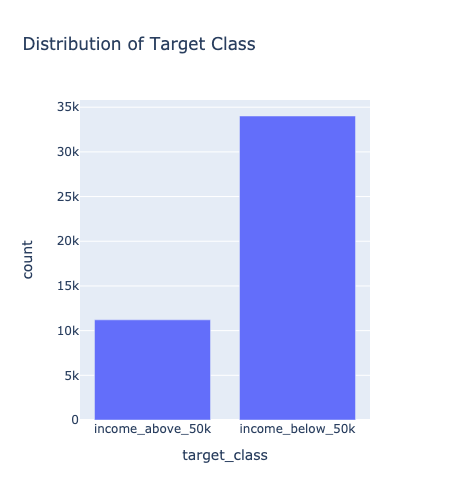

In [7]:
#distribution of the target class
df = data[['income_above_50k','income_below_50k']].sum().to_frame()
df.reset_index(inplace=True)
df.columns = ['target_class','count']
fig=px.bar(df,x='target_class',y='count', title='Distribution of Target Class', height = 500, width = 450)
fig.show(renderer='png')

It is evident from the dataset that there is a unequal distribution of the target class. About 25% of population have income above $50,000. 

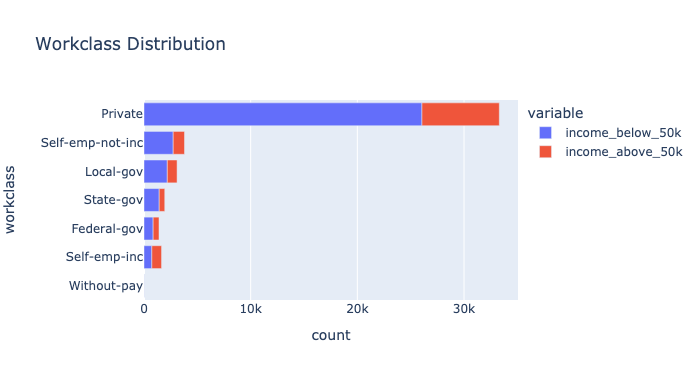

In [8]:
#workclass
df = data.groupby(by='workclass')['income_above_50k','income_below_50k'].sum()
df.reset_index(inplace=True)
fig = px.bar(df.sort_values(by='income_below_50k'), y='workclass',x=['income_below_50k','income_above_50k'], title="Workclass Distribution",height=380)
fig.update_layout(xaxis_title="count")
fig.show(renderer='png')

Most people work in the Private sector. The private sector also indicates a high presence of wealthy people.

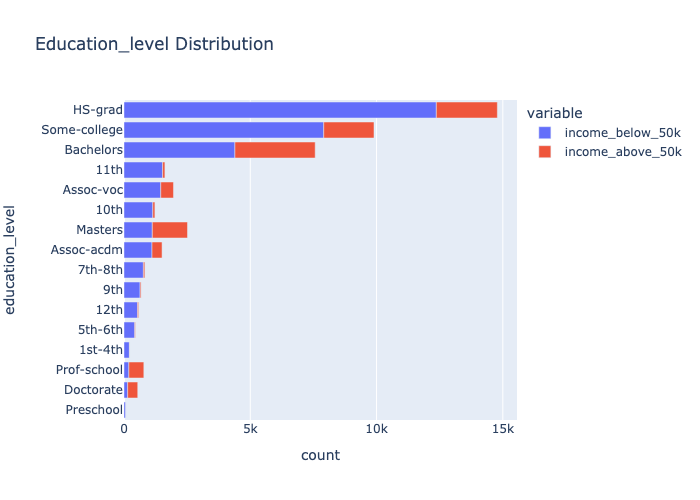

In [9]:
#education_level
df = data.groupby(by='education_level')['income_above_50k','income_below_50k'].sum()
df.reset_index(inplace=True)
fig = px.bar(df.sort_values(by='income_below_50k'), y='education_level',x=['income_below_50k','income_above_50k'], title="Education_level Distribution")
fig.update_layout(xaxis_title="count")
fig.show(renderer='png')

Looking at the distribution of education-level, it can be concluded that most wealthy people hold a college or higher level of degree.

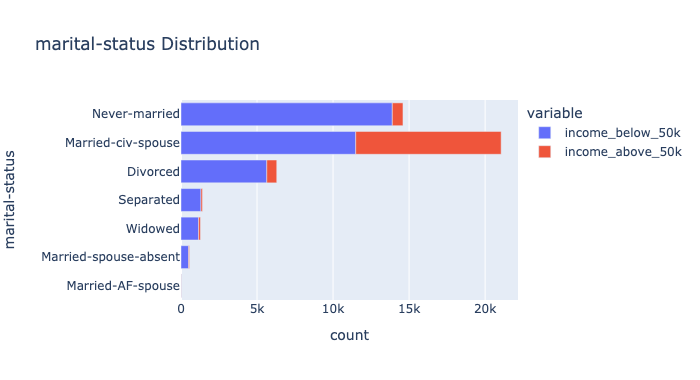

In [10]:
#marital status
df = data.groupby(by='marital-status')['income_above_50k','income_below_50k'].sum()
df.reset_index(inplace=True)
fig = px.bar(df.sort_values(by='income_below_50k'), y='marital-status',x=['income_below_50k','income_above_50k'], title="marital-status Distribution", height=380)
fig.update_layout(xaxis_title="count")
fig.show(renderer='png')

Most wealthy people have a civilian spouse.

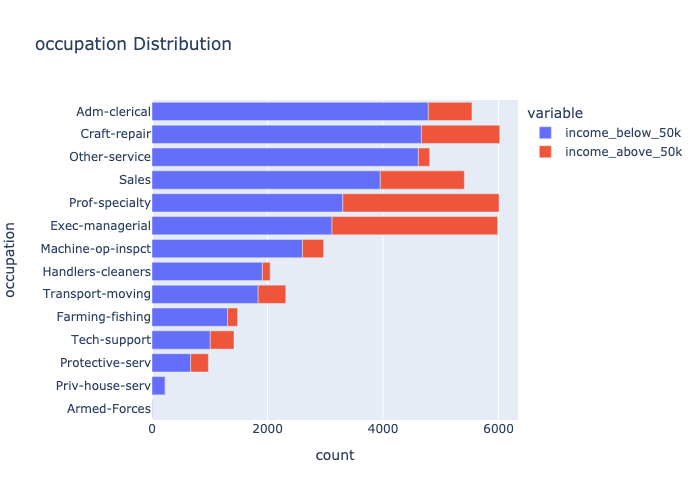

In [11]:
#occupation
df = data.groupby(by='occupation')['income_above_50k','income_below_50k'].sum()
df.reset_index(inplace=True)
fig = px.bar(df.sort_values(by='income_below_50k'), y='occupation',x=['income_below_50k','income_above_50k'], title="occupation Distribution")
fig.update_layout(xaxis_title="count")
fig.show(renderer='png')

The plot above shows the distribution of wealthy people in different occupations.

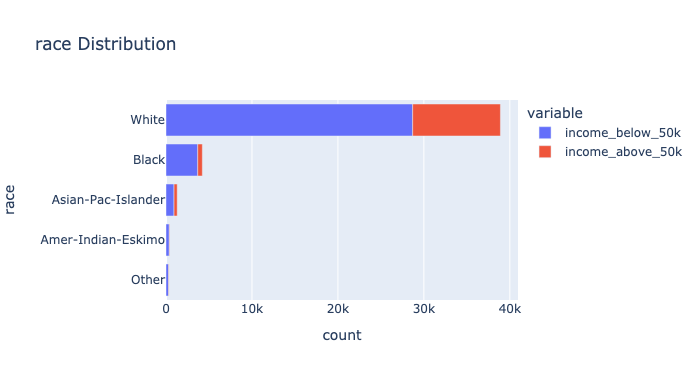

In [12]:
#race 
df = data.groupby(by='race')['income_above_50k','income_below_50k'].sum()
df.reset_index(inplace=True)
fig = px.bar(df.sort_values(by='income_below_50k'), y='race',x=['income_below_50k','income_above_50k'], title="race Distribution", height=380)
fig.update_layout(xaxis_title="count")
fig.show(renderer='png')

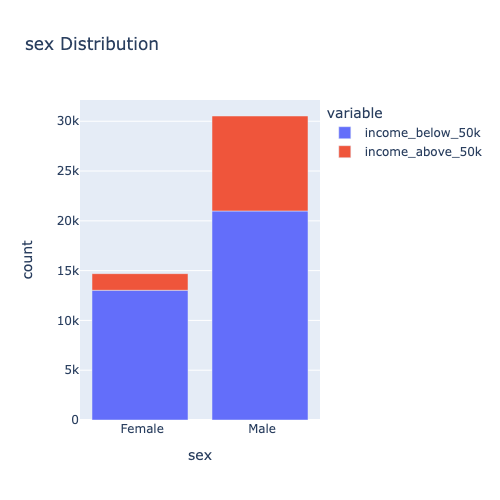

In [13]:
#sex 
df = data.groupby(by='sex')['income_above_50k','income_below_50k'].sum()
df.reset_index(inplace=True)
fig = px.bar(df.sort_values(by='income_below_50k'), x='sex',y=['income_below_50k','income_above_50k'], title="sex Distribution", height=500, width=500)
fig.update_layout(yaxis_title="count")
fig.show(renderer='png')

The males constitute a greater proportion of wealthy people.
So it can be summarized that a wealthy person may have these characteristics - he is a white male college graduate with a job in the private sector and marries to a civilian spouse.

In [14]:
#dropping features income_above_50k and income_below_50k
data.drop(['income_above_50k'], axis = 1,inplace =True)
data.drop(['income_below_50k'], axis = 1,inplace =True)

### Exploring Numerical Features 

To understand the distribution of continuous numerical attributes, we plot histograms for each of them.

Text(0.5, 1.0, 'Distribution of Working hours per Week')

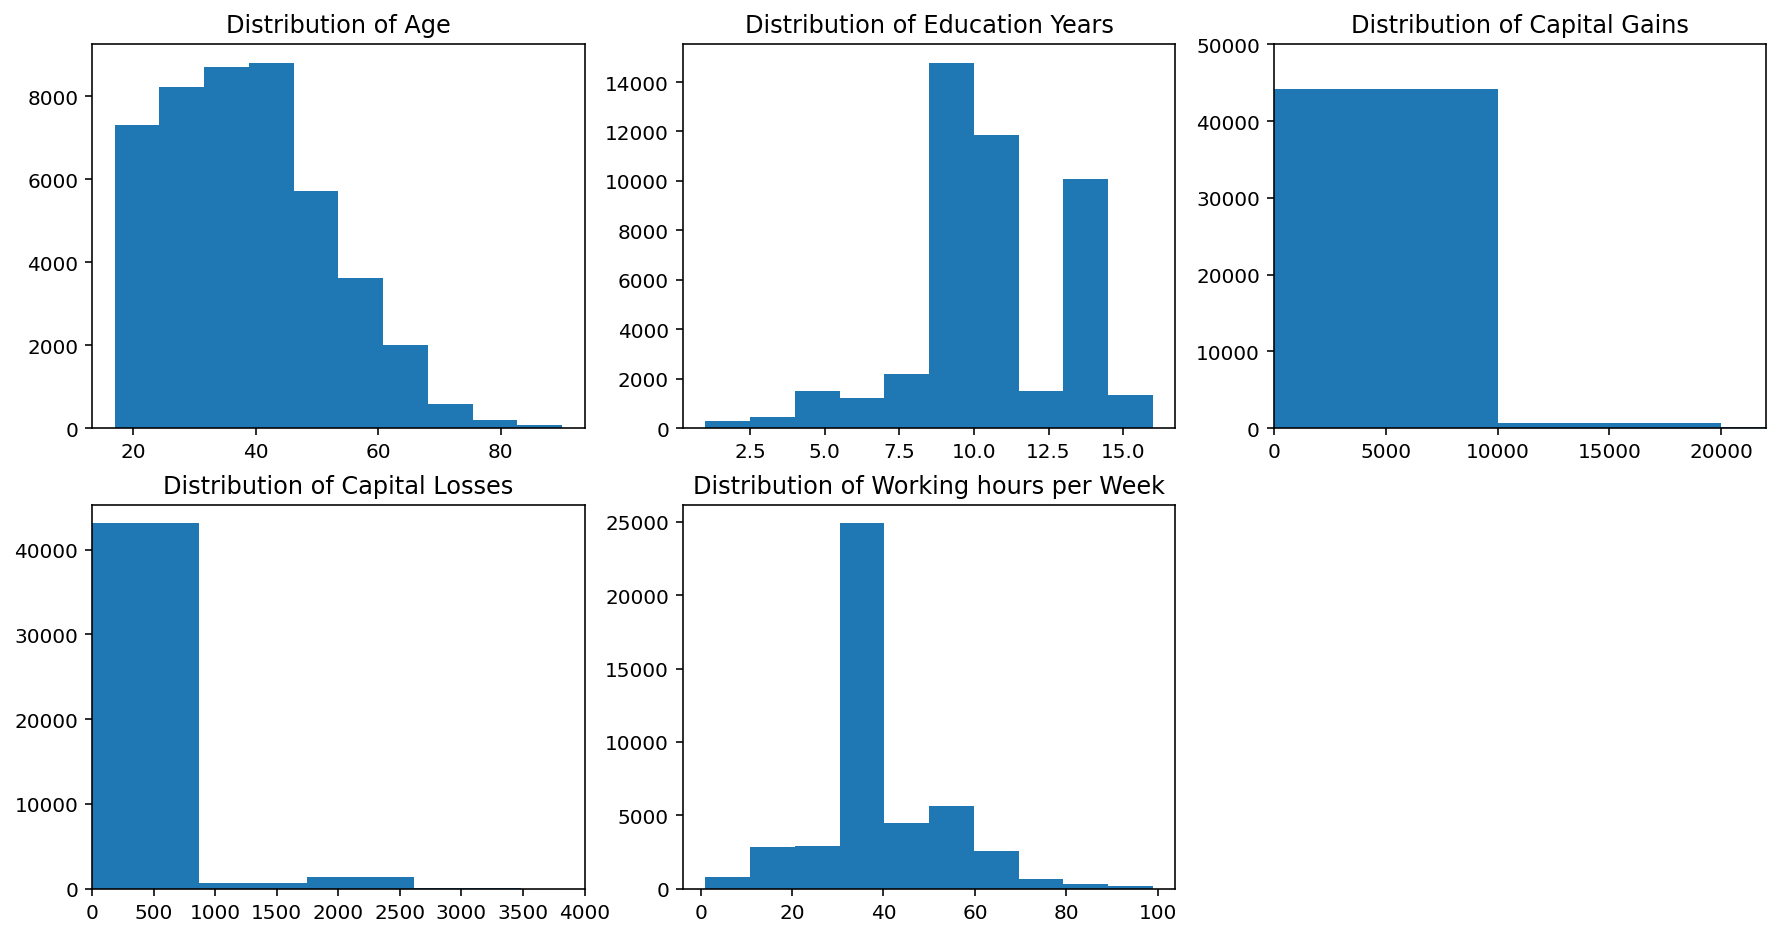

In [15]:
plt.figure(figsize=(15,12))

plt.subplot(3,3,1)
plt.hist(data['age'])
plt.title('Distribution of Age')

plt.subplot(3,3,2)
plt.hist(data['education-num'])
plt.title('Distribution of Education Years')

plt.subplot(3,3,3)
plt.hist(data['capital-gain'])
plt.xlim([0, 22000])
plt.ylim([0, 50000])
plt.title('Distribution of Capital Gains')

plt.subplot(3,3,4)
plt.hist(data['capital-loss'], bins = 5)
plt.xlim([0, 4000])
plt.title('Distribution of Capital Losses')

plt.subplot(3,3,5)
plt.hist(data['hours-per-week'])
plt.title('Distribution of Working hours per Week')


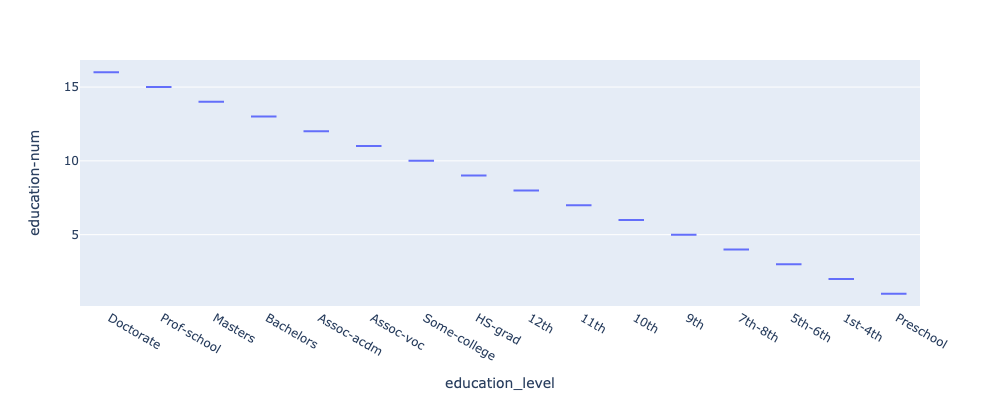

In [16]:
#Relation between education years and education Level
fig = px.box(data.sort_values(by='education-num', ascending = False), x="education_level", y="education-num",width=1000, height=400)
fig.show(renderer='png')

Since every education level corresponds to the number of education year, these features are essentially the same. Education level can be dropped. education_num represents education_level when label encoded.

Education level attribute is dropped as discussed. The target variable - income is spearate from the rest of the dataset.

In [17]:
#education level and number of education years represent the same quantity. 
#Dropping education level, number of education years represents education level when label encoded. 
data.drop(['education_level'], axis = 1,inplace =True)

In [18]:
#encoding income attribute to 1 for income above 50k. Storing target series in a separate variable
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0 )
target = data['income']
data.drop(['income'],axis=1,inplace=True)

*****

# Feature Transformation

Capital Losses and Capital Gains have a very skewed distribution. 
We perform log normalisation on these skewed features. The numerical features are also scaled using Min-Max scaler. 
Further the categorical variables are encoded using one-hot encoding to convert them into numerical features.

In [19]:
#prcoessing numberical features 
#transforming skewed continous features - capital gain and capital losses 

data['capital-gain']=data['capital-gain'].apply(lambda x: np.log(x+1))
data['capital-loss']=data['capital-loss'].apply(lambda x: np.log(x+1))

#scaling numerical features so that all features are treated equally by the model
scale_features = ['age','education-num','capital-gain','capital-loss','hours-per-week']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[scale_features] = scaler.fit_transform(data[scale_features])

#one hot encoding fot categorical features
encoded_features = ['workclass','marital-status','occupation','relationship','race','sex','native-country']
data = pd.get_dummies(data,columns = encoded_features ,prefix = encoded_features, drop_first=True)
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.667492,0.0,0.397959,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.000000,0.0,0.122449,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# #function for feature processing for a given data set
# def process_df(df, scale_features,encoded_features):
#     df.drop(['education_level'], axis =1, inplace=True)
#     df['capital-gain']=df['capital-gain'].apply(lambda x: np.log(x+1))
#     df['capital-loss']=df['capital-loss'].apply(lambda x: np.log(x+1))
#     df[scale_features] = scaler.transform(df[scale_features])
#     df = pd.get_dummies(df,columns = encoded_features ,prefix = encoded_features, drop_first=True)
#     return df     

*****

# Modeling 

Before applying any machine learning model to the dataset, we use a dummy classifier to establish a baseline accuracy and ROC-AUC score. The dummy classifier predicts the majority class label for every datapoint. On applying any machine learning alogorithm, the classification should improve, so should the accuracy and ROC-AUC score.

In [21]:
#baseline model and evaluation of base line model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

dummyClassifier = DummyClassifier(strategy="most_frequent")
dummyClassifier.fit(data,target)
pred = dummyClassifier.predict(data)
print("Accuracy Score: ",accuracy_score(target,pred))
print("F1 Score: ",f1_score(target,pred))
print("ROC-AUC Score: ", roc_auc_score(target,pred))

Accuracy Score:  0.7521560302507629
F1 Score:  0.0
ROC-AUC Score:  0.5


The current ROC-AUC score is 0.5, indicating that the dummy classifier is unable to distinguish between positive and negative groups.

### Train-Test Split

The dataset is divided into training and validation sets using train-test split. The size of the testing sample is 20% of the entire dataset.

In [22]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val = train_test_split(data,target,test_size=0.2,random_state=42)
print("Training set has {} samples".format(x_train.shape[0]))
print("Testing set has {} samples".format(x_val.shape[0]))

Training set has 36177 samples
Testing set has 9045 samples


A generic function evaluate_model is written to evaluate the performance of a given model in terms of training time, prediction time, ROC-AUC score of training and testing set. The results of these models can be compared visually using the compare_model method.

In [23]:
from sklearn.metrics import roc_auc_score

def evaluate_model(model,x_train,x_test,y_train,y_test):
    results = {}
    
    start = time()
    model.fit(x_train,y_train)
    end = time()
    
    results['train_time'] = end - start 
    
    start = time()
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train[:300])
    end = time()
    
    results['pred_time'] = end - start 
    
    results['roc_train'] = roc_auc_score(y_train[:300],train_pred)
    
    results['roc_test'] = roc_auc_score(y_test,test_pred)
    
    return results

In [24]:
def compare_model(results):
    
    fig, axes = plt.subplots(2,2,figsize=(18,10))
    
    colour = ['rosybrown','lightcoral','indianred','brown','maroon']
    
    for i,model in enumerate(results.keys()):
        for j, metric in enumerate(['train_time','pred_time','roc_train','roc_test']):
            
            axes[j//2,j%2].bar(i,results[model][metric],color = colour[i])
            
    #setting y labels
    axes[0,0].set_ylabel("Time in sec")
    axes[0,1].set_ylabel("Time in sec")
    axes[1,0].set_ylabel("ROC-AUC score")
    axes[1,1].set_ylabel("ROC-AUC score")
    
    #setting titles 
    axes[0,0].set_title("Model Training")
    axes[0,1].set_title("Model Prediction")
    axes[1,0].set_title("ROC-AUC for Training Set")
    axes[1,1].set_title("ROC-AUC for Test Set")
    
    axes[1,0].set_ylim((0,1))
    axes[1,1].set_ylim((0,1))
    
    patches = []
    for i, model in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colour[i], label = model))
    axes[0, 0].legend(handles = patches)
    
    
    plt.suptitle("Performance Metrics for Supervised Learning Models", fontsize = 16, y = 1.10)
    plt.tight_layout()
    plt.show()

### Applying Machine Learning Models

For the purpose of classification with 80 attributes, 5 models were used for prediction - Naive Bayes, Decision Tree Classifier, Graident Boosting Classifier, Random Forest Classifier and Bagging Classifier.

This is decided keeping in mind the size of the dataset. Ensemble methods (Random Forest, Gradient Boosting, Bagging Classifier) tend to perform better in case of non-linear data. These models reduce variance and run efficiently on large datasets. Time for training can be large while fitting multiple estimators. 
Naive Bayes performs well with categorical data. The correlation between features however can affect its performance. 

I have not considered other classification algorithms such as K-Nearest Neighbours (slow in predicting for a dataset with large number of attributes) and logistic regression (Absence of linear correlation between features).

n_estimators in tree based algorithms is considered 100 for now

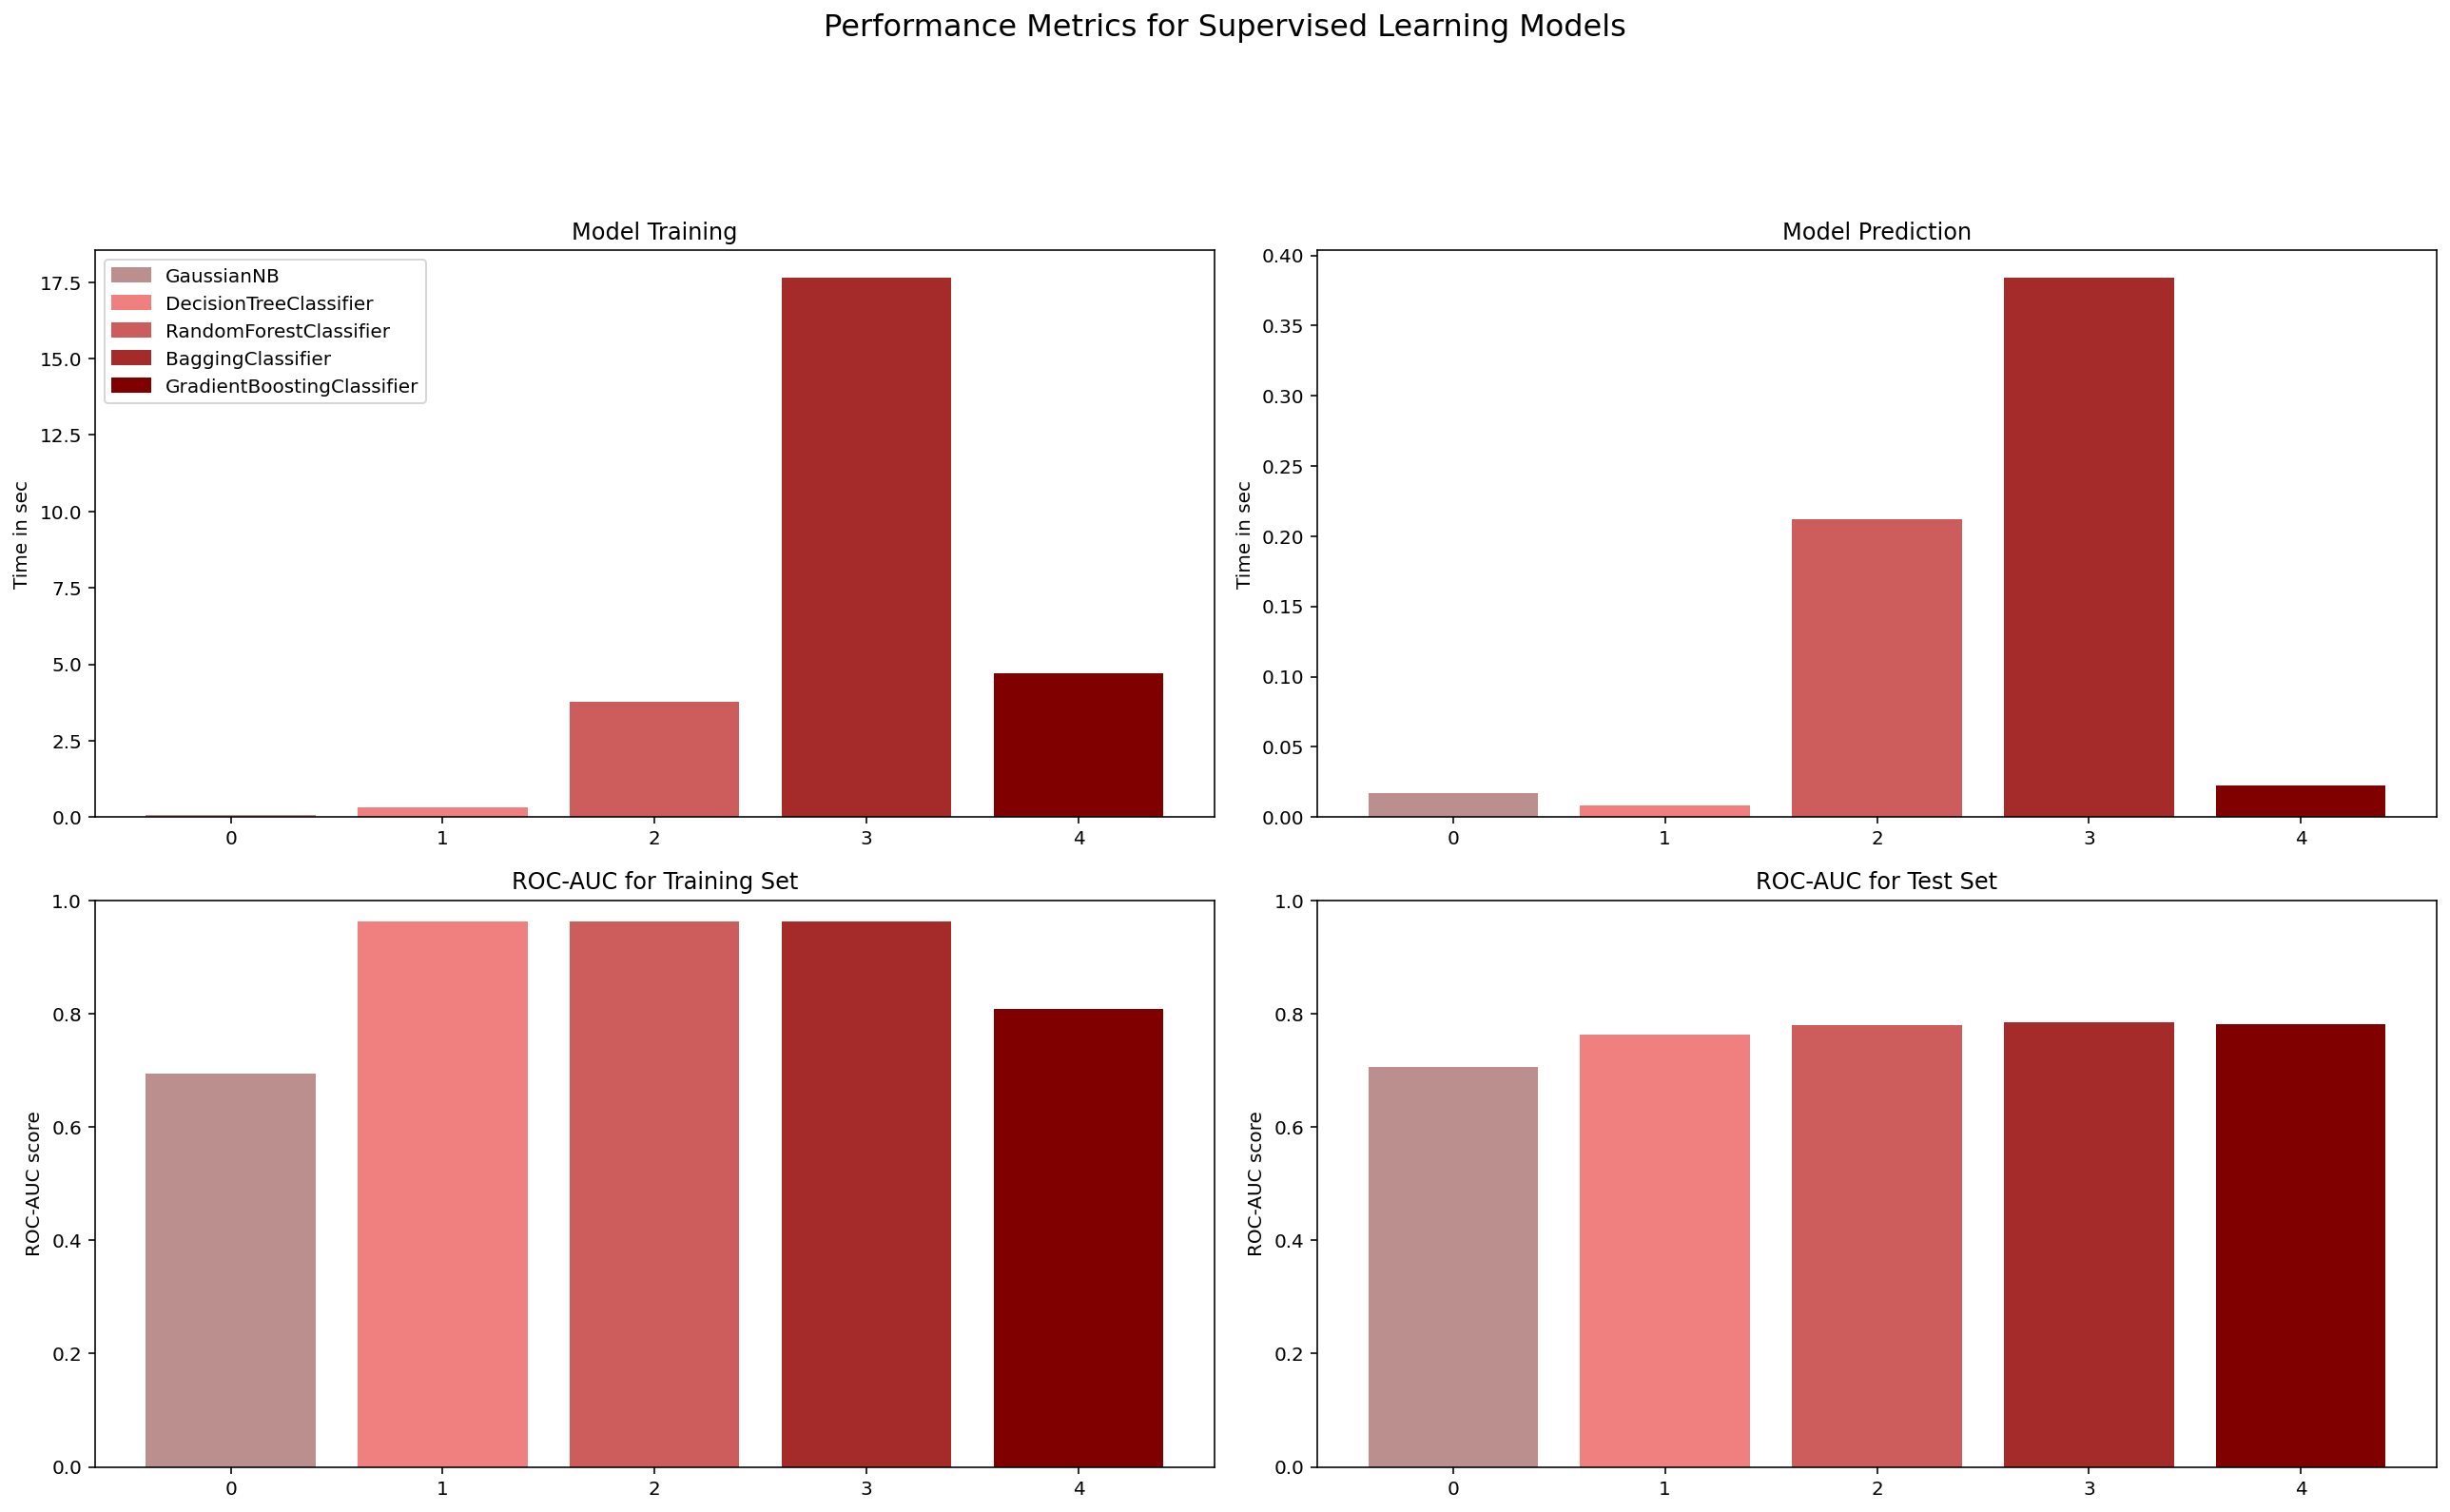

In [25]:
#importing models for machine learning 

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

random_state = 1
n_estimators = 100 

clf1 = GaussianNB()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier(random_state = random_state, n_estimators = n_estimators)
clf4 = BaggingClassifier(random_state = random_state, n_estimators = n_estimators)
clf5 = GradientBoostingClassifier(random_state = random_state, n_estimators = n_estimators)

results = {}
for clf in [clf1,clf2,clf3,clf4,clf5]:
    clf_name = clf.__class__.__name__
    results[clf_name] = evaluate_model(clf,x_train,x_val,y_train,y_val)

compare_model(results)

Looking at the performance of the different supervised learning models it is evident that Gradient Boosting Classifier is the best performing alogrithm given its high ROC-AUC score on the test data and comparitively lesser model training and prediction time. Gradient Boosting Classifier is further tuned to improve performance over test dataset.

******

# Hyperparameter Tuning

I have tuned for the following parameters in Gradient Boosting Classifier using Grid Search Cross Validation:
1. n_estimators 
2. learning_rate
3. min_sample_split
4. min_sample_leaf
5. max_depth 
6. subsample

Firstly, all parameters except the n_estimators is kept constant for the Gradient Boosting Classifier.

In [26]:
#hyperparameter tuning for gradient boosting classifier 

#finding the number of estimators
from sklearn.metrics import make_scorer 
from sklearn.model_selection import GridSearchCV

clf = GradientBoostingClassifier(random_state = random_state)

parameters = {
    'n_estimators' : range(20,101,20),
    'learning_rate' : [0.2],
    'min_samples_split': [500],
    'min_samples_leaf' : [50],
    'max_depth': [8],
    'subsample': [0.8] 
}

scorer = make_scorer(roc_auc_score)

grid_cv = GridSearchCV(clf,param_grid=parameters,scoring=scorer,verbose = 1, n_jobs = -1)
grid_fit = grid_cv.fit(x_train,y_train)

best_clf = grid_fit.best_estimator_

predictions = clf.fit(x_train,y_train).predict(x_val)
best_pred_val = best_clf.predict(x_val)
best_pred_train = best_clf.predict(x_train[:300])

print("For unoptimized model ----------")
print("The ROC-AUC score on validation data is {}".format(roc_auc_score(y_val,predictions)))
print("")
print("")


print("For optimized model ----------")
print("The ROC-AUC score on validation data is {}".format(roc_auc_score(y_val,best_pred_val)))
print("The ROC-AUC score on training data is {}".format(roc_auc_score(y_train[:300],best_pred_train)))
print("")
print("-------------")
print("The parameters for optimized model are : ", grid_cv.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
For unoptimized model ----------
The ROC-AUC score on validation data is 0.7821233119541044


For optimized model ----------
The ROC-AUC score on validation data is 0.8022208076836305
The ROC-AUC score on training data is 0.8589548452562151

-------------
The parameters for optimized model are :  {'learning_rate': 0.2, 'max_depth': 8, 'min_samples_leaf': 50, 'min_samples_split': 500, 'n_estimators': 80, 'subsample': 0.8}


On optimizing the number of estimators to 80 in the classifier, the ROC-AUC score has increased from 0.78 to 0.802.

Keeping the n_estimators fixed at 80, the model is tuned for min_samples_split and max_depth.

In [27]:
#finding the min_sample_split and depth

clf = GradientBoostingClassifier(random_state = random_state)

parameters = {
    'n_estimators' : [80],
    'learning_rate' : [0.2],
    'min_samples_split': range(100,601,100),
    'min_samples_leaf' : [50],
    'max_depth': range(2,12,2),
    'subsample': [0.8] 
}

scorer = make_scorer(roc_auc_score)

grid_cv = GridSearchCV(clf,param_grid=parameters,scoring=scorer,verbose = 1, n_jobs = -1)
grid_fit = grid_cv.fit(x_train,y_train)

best_clf = grid_fit.best_estimator_

best_pred_val = best_clf.predict(x_val)
best_pred_train = best_clf.predict(x_train[:300])

print("For optimized model ----------")
print("The ROC-AUC score on validation data is {}".format(roc_auc_score(y_val,best_pred_val)))
print("The ROC-AUC score on training data is {}".format(roc_auc_score(y_train[:300],best_pred_train)))
print("")
print("-------------")
print("The parameters for optimized model are : ", grid_cv.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
For optimized model ----------
The ROC-AUC score on validation data is 0.8000768685338576
The ROC-AUC score on training data is 0.8566717402333841

-------------
The parameters for optimized model are :  {'learning_rate': 0.2, 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 80, 'subsample': 0.8}


The optimal max_depth is 6 and min_sample_split is 100. The ROC-AUC is similar. The min_samples_leaf is further tuned.

In [28]:
#finding the min_samples_leaf

clf = GradientBoostingClassifier(random_state = random_state)

parameters = {
    'n_estimators' : [80],
    'learning_rate' : [0.2],
    'min_samples_split': [100],
    'min_samples_leaf' : range(20,81,10),
    'max_depth': [6],
    'subsample': [0.8] 
}

scorer = make_scorer(roc_auc_score)

grid_cv = GridSearchCV(clf,param_grid=parameters,scoring=scorer,verbose = 1, n_jobs = -1)
grid_fit = grid_cv.fit(x_train,y_train)

best_clf = grid_fit.best_estimator_

best_pred_val = best_clf.predict(x_val)
best_pred_train = best_clf.predict(x_train[:300])

print("For optimized model ----------")
print("The ROC-AUC score on validation data is {}".format(roc_auc_score(y_val,best_pred_val)))
print("The ROC-AUC score on training data is {}".format(roc_auc_score(y_train[:300],best_pred_train)))
print("")
print("-------------")
print("The parameters for optimized model are : ", grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
For optimized model ----------
The ROC-AUC score on validation data is 0.8000768685338576
The ROC-AUC score on training data is 0.8566717402333841

-------------
The parameters for optimized model are :  {'learning_rate': 0.2, 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 80, 'subsample': 0.8}


The model is then tuned for the optimum subsample.

In [29]:
#finding the subsample

clf = GradientBoostingClassifier(random_state = random_state)

parameters = {
    'n_estimators' : [80],
    'learning_rate' : [0.2],
    'min_samples_split': [100],
    'min_samples_leaf' : [50],
    'max_depth': [6],
    'subsample': [0.7,0.75,0.8,0.85,0.9] 
}

scorer = make_scorer(roc_auc_score)

grid_cv = GridSearchCV(clf,param_grid=parameters,scoring=scorer,verbose = 1, n_jobs = -1)
grid_fit = grid_cv.fit(x_train,y_train)

best_clf = grid_fit.best_estimator_

best_pred_val = best_clf.predict(x_val)
best_pred_train = best_clf.predict(x_train[:300])

print("For optimized model ----------")
print("The ROC-AUC score on validation data is {}".format(roc_auc_score(y_val,best_pred_val)))
print("The ROC-AUC score on training data is {}".format(roc_auc_score(y_train[:300],best_pred_train)))
print("")
print("-------------")
print("The parameters for optimized model are : ", grid_cv.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
For optimized model ----------
The ROC-AUC score on validation data is 0.8000768685338576
The ROC-AUC score on training data is 0.8566717402333841

-------------
The parameters for optimized model are :  {'learning_rate': 0.2, 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 80, 'subsample': 0.8}


After finding the optimum hyperparamters, the learning rate is tuned. The learning rate is inversely proportional to n_estimators. On decreasing the learning rate, the n_estimators also has to tuned for higher values. 

In [30]:
#finding the learning rate 

clf = GradientBoostingClassifier(random_state = random_state)

parameters = {
    'n_estimators' : range(80,400,40),
    'learning_rate' : [0.05,0.1,0.2],
    'min_samples_split': [100],
    'min_samples_leaf' : [50],
    'max_depth': [6],
    'subsample': [0.8] 
}

scorer = make_scorer(roc_auc_score)

grid_cv = GridSearchCV(clf,param_grid=parameters,scoring=scorer,verbose = 1, n_jobs = -1)
grid_fit = grid_cv.fit(x_train,y_train)

best_clf = grid_fit.best_estimator_

best_pred_val = best_clf.predict(x_val)
best_pred_train = best_clf.predict(x_train[:300])

print("For optimized model ----------")
print("The ROC-AUC score on validation data is {}".format(roc_auc_score(y_val,best_pred_val)))
print("The ROC-AUC score on training data is {}".format(roc_auc_score(y_train[:300],best_pred_train)))
print("")
print("-------------")
print("The parameters for optimized model are : ", grid_cv.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
For optimized model ----------
The ROC-AUC score on validation data is 0.8022457859283849
The ROC-AUC score on training data is 0.854388635210553

-------------
The parameters for optimized model are :  {'learning_rate': 0.1, 'max_depth': 6, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 280, 'subsample': 0.8}


Thus, the model is finally optimised. 

### Final Optimized Model

The gradient boosting classifier is trained on the training data with the optimum hyperparameters. The final ROC-AUC score achieved on the test data after prediction is 0.8022.

In [31]:
#fitting gradient boosting classifiers with optimum parameters 
final_gbc_clf = GradientBoostingClassifier(random_state=random_state, learning_rate = 0.1 , n_estimators = 280 , max_depth = 6, min_samples_leaf = 50, 
                                           min_samples_split = 100, subsample = 0.8 )  
final_gbc_clf.fit(x_train,y_train)
final_pred_gbc_clf_val = final_gbc_clf.predict(x_val)
final_pred_gbc_clf_train = final_gbc_clf.predict(x_train[:300])

print("The AUC-ROC score for optimized Gradient Boosting Classifier on the Validation Dataset is ",roc_auc_score(y_val,final_pred_gbc_clf_val))
print("The AUC-ROC score for optimized Gradient Boosting Classifier on the Training Dataset is ",roc_auc_score(y_train[:300],final_pred_gbc_clf_train))

The AUC-ROC score for optimized Gradient Boosting Classifier on the Validation Dataset is  0.8022457859283849
The AUC-ROC score for optimized Gradient Boosting Classifier on the Training Dataset is  0.854388635210553


In [32]:
#ROC-AUC score using probabilities 
prob_val_gbc = final_gbc_clf.predict_proba(x_val)[:,1]
prob_train_gbc = final_gbc_clf.predict_proba(x_train[:300])[:,1]

print("The AUC-ROC score for optimized Gradient Boosting Classifier on the Validation Dataset using probability ",roc_auc_score(y_val,prob_val_gbc))
print("The AUC-ROC score for optimized Gradient Boosting Classifier on the Training Dataset using probability ",roc_auc_score(y_train[:300],prob_train_gbc))

The AUC-ROC score for optimized Gradient Boosting Classifier on the Validation Dataset using probability  0.9313360299094338
The AUC-ROC score for optimized Gradient Boosting Classifier on the Training Dataset using probability  0.9680365296803654


On predicting the outcome using predict_proba() method which gives the probability of the data point to belong to class label with value 1, we get a higher ROC-AUC score of 0.93 on the test data. 
The predict() method considers a default threshold of 0.5 for classification. So datapoints with probability > 0.5 are predicted to belong to class with label 1. 
Clearly this dataset is imbalanced, so the optimum threshold value needs to be calculated by plotting the ROC-AUC curves.

******

# Threshold Selection for Classification

The ROC-AUC curve is plotted by finding the true positive rate (TPR) and false positive rate (FPR) for various threshold values for classification. The threshold value which has the maximum value of (TPR - FPR) indicates better ability to classify points to their correct labels.

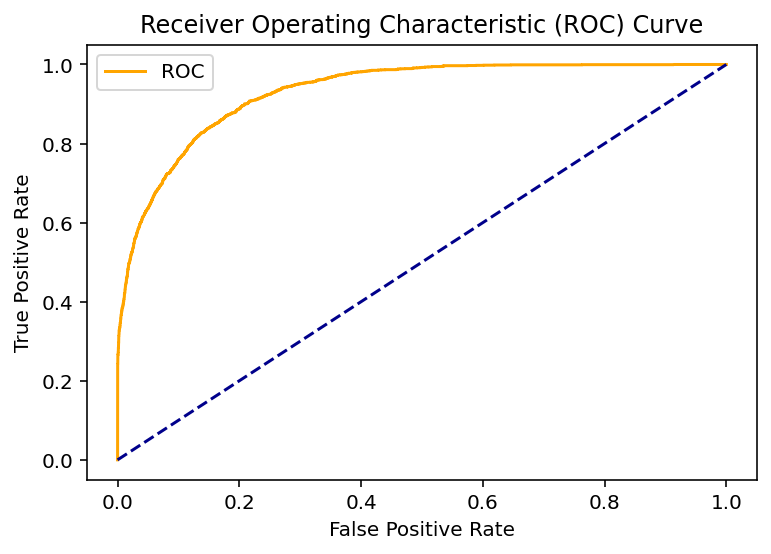

The ROC-AUC Score is  0.9313360299094338


In [33]:
#plotting roc-auc curve and finding optimum threshold for classification

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_val, prob_val_gbc)

plot_roc_curve(fpr,tpr)
print("The ROC-AUC Score is ",roc_auc_score(y_val,prob_val_gbc))

In [34]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)

Threshold value is: 0.22850707046171875


The optimum threshold value is found to be 0.2285.

In [35]:
y_pred = prob_val_gbc.copy()
for i in range(len(y_pred)):
    if (y_pred[i] > optimal_threshold):
        y_pred[i] = 1
    else: 
        y_pred[i] = 0 
y_pred

array([1., 0., 0., ..., 0., 0., 0.])

Data points with probabilities > optimum threshold will be considered to belong to the class with value 1.

In [36]:
print("The ROC-AUC Score achieved by selecting the optimum threshold for classification is" ,roc_auc_score(y_val,y_pred))

The ROC-AUC Score achieved by selecting the optimum threshold for classification is 0.8459610983981694


******

# Processing of Test Data

In [37]:
#procesing test data
scale_features = ['age','education-num','capital-gain','capital-loss','hours-per-week']
encoded_features = ['workclass','marital-status','occupation','relationship','race','sex','native-country']

test_data = pd.read_csv('test_census.csv')
test_data.drop(['Unnamed: 0'],axis=1,inplace = True)
test_data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


In [38]:
test_data.isnull().sum()

age                17
workclass          22
education_level    20
education-num      14
marital-status     21
occupation         22
relationship       16
race               19
sex                19
capital-gain       15
capital-loss       17
hours-per-week     13
native-country     16
dtype: int64

In the test dataset, we observe missing values for the above attributes. The missing values are imputed using median for skewed features like captial_loss and capital_gain. For continous attributes, the mean is used for replacing null points and categorical features are filled using the most frequent occuring value for the feature.

In [39]:
#filling missing values
for col in ['age','education-num','hours-per-week']:
    test_data[col] = test_data[col].fillna(train_data[col].mean())
    
for col in ['capital-gain','capital-loss']:
    test_data[col] = test_data[col].fillna(train_data[col].median())
    
for col in ['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country']:
    test_data[col]= test_data[col].fillna(train_data.groupby([col])[col].count().sort_values(ascending=False).index[0])
    
test_data.isnull().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

Similar, transformation and prcessing is applied to the test dataset as the train dataset.

In [40]:
test_data.drop(['education_level'],axis=1,inplace = True)
test_data['capital-gain']=test_data['capital-gain'].apply(lambda x: np.log(x+1))
test_data['capital-loss']=test_data['capital-loss'].apply(lambda x: np.log(x+1))
test_data[scale_features] = scaler.transform(test_data[scale_features])
test_data = pd.get_dummies(test_data,columns = encoded_features ,prefix = encoded_features, drop_first=True)
test_data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.054795,0.333333,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.438356,0.800000,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.369863,0.733333,0.000000,0.0,1.000000,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.232877,0.800000,0.772653,0.0,0.459184,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.095890,0.533333,0.000000,0.0,0.397959,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


****

# Prediction for Test Data & Submission

The optimized gradient boosting classifier is used for prediction of probabilites for datapoints to belong to class with value 1. The optimum threshold value obtained earlier is used for classification to correct labels.

In [41]:
#predicting on test dataset 
pred_test = final_gbc_clf.predict(test_data)
prob_test = final_gbc_clf.predict_proba(test_data)[:,1]


submission_pred = prob_test.copy()
for i in range(len(submission_pred)):
    if (submission_pred[i] > optimal_threshold):
        submission_pred[i] = int(1)
    else: 
        submission_pred[i] = int(0) 
submission_pred

array([0., 1., 0., ..., 0., 1., 0.])

The submission dataset is prepared.

In [42]:
submission_df = pd.DataFrame(data=submission_pred)
submission_df.reset_index(inplace=True)
submission_df.columns = ['id','income']
submission_df.to_csv("submission.csv", index=False)